In [2]:
# This is a quick-start file for the assignment. Feel free to erase cells you don't need.

In [3]:
# Your environment is probably missing some packages. We will check and, if necessary, install.
# https://pypi.org/project/yfinance
import pip
from pip._internal.utils.misc import get_installed_distributions
pkgs = ''.join(str(get_installed_distributions(local_only=True)))
if "yfinance" not in pkgs:
    !pip install yfinance
if "lxml" not in pkgs:
    !pip install lxml 

In [66]:
# Now we can import yfinance
import yfinance as yf
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pathlib import Path

In [14]:
# Let's define some useful constants
START = "2020-01-01"
END   = "2020-12-01"

company_name = 'AAPL'

TICKERS = [company_name]

DATAFILE_NAME = "data.pickle1" + company_name

In [15]:
# It's practical to download data from Yahoo!Finance just once and keep a local copy
if Path(DATAFILE_NAME).is_file(): # check if we got the datafile already
    data = pd.read_pickle(DATAFILE_NAME) # read it
else:
    data = yf.download(tickers=TICKERS, start=START, end=END, auto_adjust=True)
    data.to_pickle(DATAFILE_NAME) # save localy

[*********************100%***********************]  1 of 1 completed


In [20]:
#Load Microsoft
company_name = 'MSFT'

TICKERS = [company_name]

DATAFILE_NAME = "data.pickle1" + company_name

if Path(DATAFILE_NAME).is_file(): # check if we got the datafile already
    data_ms = pd.read_pickle(DATAFILE_NAME) # read it
else:
    data_ms = yf.download(tickers=TICKERS, start=START, end=END, auto_adjust=True)
    data_ms.to_pickle(DATAFILE_NAME) # save localy

[*********************100%***********************]  1 of 1 completed


In [16]:
data["Change"] = data["Close"] - data["Open"]

In [17]:
data["Mid-range"] = (data["High"] + data["Low"]) / 2

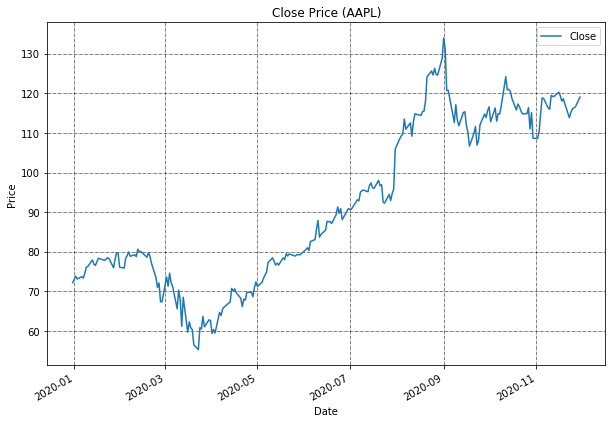

In [18]:
data.plot(y="Close", figsize=(10, 7))
plt.title("Close Price (AAPL)")
plt.ylabel("Price")
plt.xlabel("Date")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

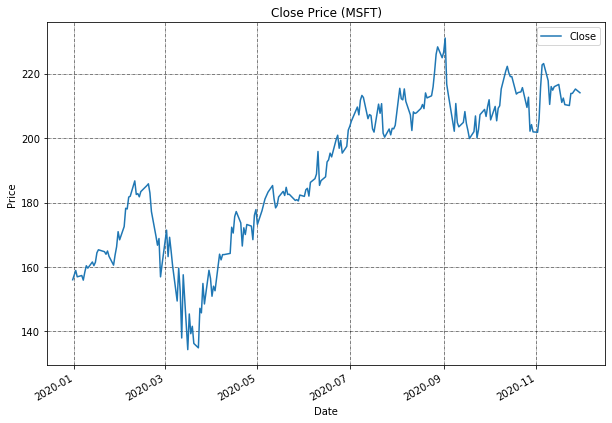

In [21]:
data_ms.plot(y="Close", figsize=(10, 7))
plt.title("Close Price (MSFT)")
plt.ylabel("Price")
plt.xlabel("Date")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

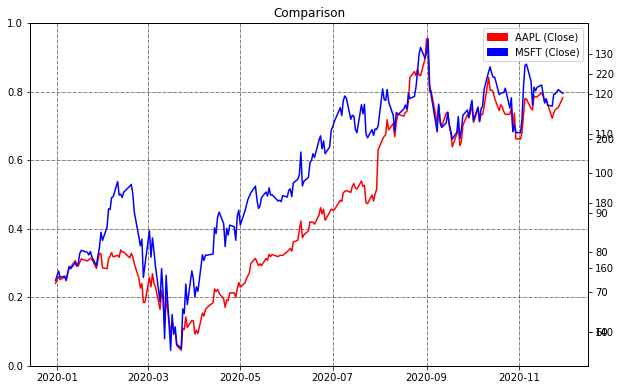

In [73]:
figure, axes = plt.subplots(figsize=(10, 7))

axes.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

axes.set_title("Comparison")

ax3 = axes.twinx()
data.Close.plot(axes=ax3, style='r-')

ax4 = axes.twinx()
data_ms.Close.plot(axes=ax4, style='b-')

red_patch = mpatches.Patch(color="red", label="AAPL (Close)")
blue_patch = mpatches.Patch(color="blue", label="MSFT (Close)")
plt.legend(handles=[red_patch,blue_patch])